## Import the Model

In [1]:
import sys
sys.path.append('../')

import src.TagModel
import src.Auth
import numpy as np
import matplotlib.pyplot as plt 

### Run the Model

In [2]:
m, n = 20, 20  # number of messages and tags
p, q = 0.5, 1 # probability of a message and probability of a tag being correct

varInfo = src.TagModel.math_model(M_size=m, 
                                  T_size=n, 
                                  p=p, q=q, 
                                  TagEveryMessage=True, 
                                  AtLeastOnce=False, 
                                  EquivalentA=True)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-06
Set parameter TimeLimit to value 21600
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.4.0 23E224)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 16880 rows, 17621 columns and 51640 nonzeros
Model fingerprint: 0xa9987d29
Variable types: 8401 continuous, 9220 integer (9220 binary)
Coefficient statistics:
  Matrix range     [1e-06, 2e+01]
  Objective range  [1e-06, 5e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 8800 rows and 8820 columns
Presolve time: 0.03s
Presolved: 8080 rows, 8801 columns, 33620 nonzeros
Variable types: 1 continuous, 8800 integer (8800 binary)

Root relaxation: objective 2.000000e+02, 8825 iterations, 0.06 seconds (0.15 work units)

    Nodes    |    Current Node    |     Objective Bounds   

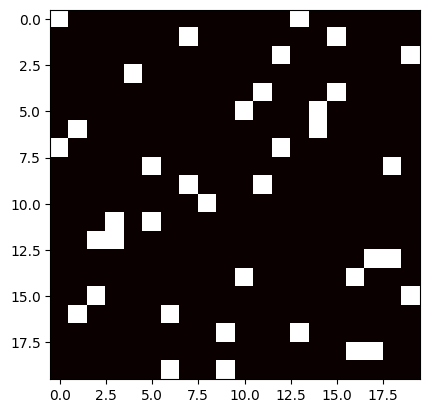

In [3]:
X = src.TagModel.get_X(varInfo, m, n)
#heatmap
plt.imshow(X, cmap= 'hot')
# plt.colorbar()
plt.show()

In [8]:
X

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [5]:
print(src.Auth.validate(src.Auth.X, np.array([p]*18), np.array([q]*9)))
print(src.Auth.Strength_Number(np.array(src.Auth.X,dtype=int)))

L = src.Auth.Latency(np.array(src.Auth.X,dtype=int), np.ones(18), np.ones(9))
print('average Latency: ', np.average(L))
print('L:', L)



[0.140625 0.140625 0.140625 0.140625 0.140625 0.140625 0.140625 0.140625
 0.140625 0.140625 0.140625 0.140625 0.140625 0.140625 0.140625 0.140625
 0.140625 0.140625]
[ 0  3  6  9 13 17]
average Latency:  1.0
L: [2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0]


In [6]:
A = src.Auth.validate(X, np.array([p]*m), np.array([q]*n))
print('average A:',np.average(A))
print ("A = ", A)

L = src.Auth.Latency(X, np.ones(m), np.ones(n))
print('average L:', np.average(L))
print("L =", L)

print("Rows that breaks the verification",src.Auth.Strength_Number(np.array(X,dtype=int)))

average A: 0.5
A =  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]
average L: 2.9
L = [ 7  8  5  0  5  9 10  0  3  0  0  1  3  5  0  0  0  2  0  0]
Rows that breaks the verification [ 0  1  2  3  4  5  6  8 10 12 18 19]


In [7]:
print(varInfo)

[('x[message1,tag1]', 1.0), ('x[message1,tag14]', 1.0), ('x[message2,tag8]', 1.0), ('x[message2,tag16]', 1.0), ('x[message3,tag13]', 1.0), ('x[message3,tag20]', 1.0), ('x[message4,tag5]', 1.0), ('x[message5,tag12]', 1.0), ('x[message5,tag16]', 1.0), ('x[message6,tag11]', 1.0), ('x[message6,tag15]', 1.0), ('x[message7,tag2]', 1.0), ('x[message7,tag15]', 1.0), ('x[message8,tag1]', 1.0), ('x[message8,tag13]', 1.0), ('x[message9,tag6]', 1.0), ('x[message9,tag19]', 1.0), ('x[message10,tag8]', 1.0), ('x[message10,tag12]', 1.0), ('x[message11,tag9]', 1.0), ('x[message12,tag4]', 1.0), ('x[message12,tag6]', 1.0), ('x[message13,tag3]', 1.0), ('x[message13,tag4]', 1.0), ('x[message14,tag18]', 1.0), ('x[message14,tag19]', 1.0), ('x[message15,tag11]', 1.0), ('x[message15,tag17]', 1.0), ('x[message16,tag3]', 1.0), ('x[message16,tag20]', 1.0), ('x[message17,tag2]', 1.0), ('x[message17,tag7]', 1.0), ('x[message18,tag10]', 1.0), ('x[message18,tag14]', 1.0), ('x[message19,tag17]', 1.0), ('x[message19,ta

Case 1: Make the result all equal to each other.

Case 1.5: Priorotize the messages for the differet application like emergency 

Case 2: Add a new constraint that include a value for the E(A). 

describe the trends of the results.